In [1]:
import numpy as np

In [6]:
%run magic.ipynb

## Chain Rule
考慮 $F = f(\mathbf{a},\mathbf{g}(\mathbf{b},\mathbf{h}(\mathbf{c}, \mathbf{i}))$

$\mathbf{a},\mathbf{b},\mathbf{c},$  代表著權重 , $\mathbf{i}$ 是輸入

站在 $\mathbf{g}$  的角度，為了要更新權重，我們想算
### $\frac{\partial F}{\partial b_i}$


我們需要什麼？ 由 chain rule 得知
### $\frac{\partial F}{\partial b_i} = 
\sum_j \frac{\partial F}{\partial g_j}\frac{\partial g_j}{\partial b_i}$
或者寫成 Jabobian 的形式
### $\frac{\partial F}{\partial \mathbf{b}} = 
\frac{\partial F}{\partial \mathbf{g}} \frac{\partial \mathbf{g}}{\partial \mathbf{b}}$

所以我們希望前面能傳給我們 $\frac{\partial F}{\partial \mathbf{g}}$


將心比心，因為 $\mathbf{h}$ 也要算 $\frac{\partial F}{\partial \mathbf{c}}$， 所以我們還要負責傳 $\frac{\partial F}{\partial \mathbf{h}}$ 給他。 而因為 
### $\frac{\partial F}{\partial \mathbf{h}}=
\frac{\partial F}{\partial \mathbf{g}} \frac{\partial \mathbf{g}}{\partial \mathbf{h}}$

所以 $\mathbf{g}$ 中間真正需要負責計算的東西就是 $\frac{\partial \mathbf{g}}{\partial \mathbf{h}}$ 和 $\frac{\partial \mathbf{g}}{\partial \mathbf{b}}$

## Gradient descent

### 誤差函數
我們的誤差函數還是 Cross entropy， 
假設輸入值 $x$ 對應到的真實類別是 $y$, 那我們定義誤差函數

## $ loss = -\log(q_y)=- \log(Predict(Y=y|x)) $


或比較一般的

## $ loss = - p \cdot \log q  $

其中 $ p_i = \Pr(Y=i|x) $ 代表真實發生的機率


以一層 hidden layer  的 feedforward neural network 來看
## $ L= loss = -p \cdot \log \sigma(C(f(Ax+b))+d) $

由於
### $-\log \sigma (Z) = 1 \log (\sum e^{Z_j})-Z$
### $\frac{\partial -\log \sigma (Z)}{\partial Z} = 1 \sigma(Z)^T - \delta$
let $U = f(Ax+b) $,   $Z=CU+d$

### $ \frac{\partial L}{\partial d} = \frac{\partial L}{\partial Z} \frac{\partial CU+d}{\partial d} 
= \frac{\partial L}{\partial Z}
= p^T (1 \sigma(Z)^T - \delta)
=  \sigma(Z)^T - p^T
=  \sigma(CU+d)^T - p^T
$

### $ \frac{\partial L}{\partial C_{i,j} } 
= \frac{\partial L}{\partial Z} \frac{\partial CU+d}{\partial C_{i,j}} 
= (p^T (1 \sigma(Z)^T - \delta))_i U_j 
=  (\sigma(Z) - p)_i   U_j
$
所以

### $ \frac{\partial L}{\partial C } 
=  (\sigma(Z) - p)   U^T
$

到目前為止，都跟原來 softmax 的結果一樣。

繼續計算 A, b 的偏微分
### $ \frac{\partial L}{\partial U } 
= \frac{\partial L}{\partial Z} \frac{\partial CU+d}{\partial U} 
= (p^T (1 \sigma(Z)^T - \delta)) C
=  (\sigma(Z) - p)^T C
$

$ \frac{\partial U_k}{\partial b_i} 
= \frac{\partial f(A_kx+b_k)}{\partial b_i}
= \delta_{k,i} f'(Ax+b)_i $

$  \frac{\partial L}{\partial b_i } 
=  ((\sigma(Z) - p)^T C)_i f'(Ax+b)_i$

$  \frac{\partial L}{\partial A_{i,j} } 
=  ((\sigma(Z) - p)^T C)_i f'(Ax+b)_i x_j$

### 任務：先暴力的利用上面直接微分好的式子來試試看
* 把之前的 softmax, relu, sigmoid 都拿回來看看
* 計算 relu 和 sigmoid 的微分
* 來試試看 mod 3 問題
* 隨機設定 A,b,C,d (可以嘗試不同的隱藏層維度)
* 看看 loss
* 設定一個 x
* 計算 gradient
* 扣掉 gradient
* 看看 loss 是否有減少？

In [25]:
# %load solutions/ff_funcs.py
def softmax(x):
    t = np.exp(x)
    return t/t.sum()
def relu(x):
    return np.maximum(x, 0)
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 微分
def Drelu(x):
    return (x>0).astype('float32')
def Dsigmoid(x):
    q = sigmoid(x)
    return q * (1-q) 
    # or 
    #return np.exp(x)/(1+np.exp(-x))**2

In [26]:
# %load solutions/ff_compute_loss2.py
# 初始權重
A = np.random.normal(size=(5,4))
b = np.random.normal(size=(5,1))
C = np.random.normal(size=(3,5))
d = np.random.normal(size=(3,1))
# 開始計算
i = 9
x = Vector(i%2, (i>>1)%2, (i>>2)%2, (i>>3)%2)
y = i%3
U = relu(A@x+b)
q = softmax(C@U+d)
L = - np.log(q[y])
print("before update, L=", L)

before update, L= [3.54600971]


$ \frac{\partial L}{\partial d} =  \sigma(CU+d)^T - p^T$

$ \frac{\partial L}{\partial C } =  (\sigma(Z) - p)   U^T$

$  \frac{\partial L}{\partial b_i } 
=  ((\sigma(Z) - p)^T C)_i f'(Ax+b)_i$

$  \frac{\partial L}{\partial A_{i,j} } 
=  ((\sigma(Z) - p)^T C)_i f'(Ax+b)_i x_j$


In [27]:
# %load solutions/ff_compute_gradient.py
p = np.eye(3)[y][:, None]
grad_d = q - p
grad_C = grad_d @ U.T
grad_b = (C.T @ grad_d ) * Drelu(A@x+b)
grad_A = grad_b @ x.T

In [28]:
# %load solutions/ff_update.py
γ = 0.5
A -= γ * grad_A
b -= γ * grad_b
C -= γ * grad_C
d -= γ * grad_d

U = relu(A@x+b)
q = softmax(C@U+d)
L = - np.log(q[y])
print("after update, L=", L)

after update, L= [0.00237015]


練習：隨機訓練 20000 次

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

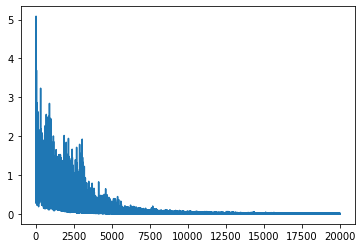

In [20]:
# %load solutions/ff_train_mod3.py
L_history = []
γ = 0.03
A = np.random.normal(size=(10,4))
b = np.random.normal(size=(10,1))
C = np.random.normal(size=(3,10))
d = np.random.normal(size=(3,1))
for t in range(20000):
    i = np.random.randint(0,16)
    x = Vector(i%2, (i>>1)%2, (i>>2)%2, (i>>3)%2)
    y = i%3
    U = relu(A@x+b)
    q = softmax(C@U+d)
    L = - np.log(q[y])
    L_history.append(L)
    p = np.eye(3)[y][:, None]
    grad_d = q - p
    grad_C = grad_d @ U.T
    grad_b = (C.T @ grad_d ) * Drelu(A@x+b)
    grad_A = grad_b @ x.T
    A -= γ * grad_A
    b -= γ * grad_b
    C -= γ * grad_C
    d -= γ * grad_d
plt.plot(L_history);

In [21]:
# 訓練結果測試
for i in range(16):
    x = Vector(i%2, (i>>1)%2, (i>>2)%2, (i>>3)%2)
    y = i%3
    U = relu(A@x+b)
    q = softmax(C@U+d)
    print(q.argmax(), y)    

0 0
1 1
2 2
0 0
1 1
2 2
0 0
1 1
2 2
0 0
1 1
2 2
0 0
1 1
2 2
0 0


### 練習：井字棋的判定

In [10]:
def truth(x):
    x = x.reshape(3,3)
    return int(x.all(axis=0).any() or
            x.all(axis=1).any() or
            x.diagonal().all() or
            x[::-1].diagonal().all())

0 0.5859375
20 0.92578125
40 0.96484375
60 0.96875
80 0.984375
100 0.994140625
120 0.998046875
140 0.998046875
160 1.0
180 1.0
200 1.0
220 1.0
240 1.0
260 1.0
280 1.0
300 1.0
320 1.0
340 1.0
360 1.0
380 1.0
400 1.0
420 1.0
440 1.0
460 1.0
480 1.0


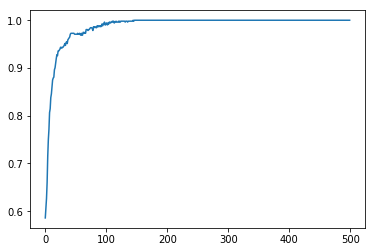

In [11]:
%run -i solutions/ff_train_ttt.py
plt.plot(accuracy_history);

Play Ground

https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/playground-exercises